# Cervical Cancer Behaviour Risk Predictor

First we have to import all libraries

In [83]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import math

In [84]:
#read csv file using 'read_csv' function
df=pd.read_csv('cervical_cancer_datasets.csv')
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [85]:
#dividing our datasets into x & y
x=df.iloc[:,0:-1]
y=df.loc[:,'ca_cervix']
#x=df.drop('ca_cervix')
#y=df['ca_cervix']

In [86]:
#Now splitting into train and test datasets
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.1,random_state=42)
#Using array function of numpy to perform powerful calculation easily
Xtrain=np.array(Xtrain)
Ytrain=np.array(Ytrain)
Xtest=np.array(Xtest)
Ytest=np.array(Ytest)

# USING SCIKET LIBRARY

In [87]:
Log_Model=LogisticRegression()
Log_Model.fit(Xtrain,Ytrain)                            #training our model
Ypred=Log_Model.predict(Xtest)                          #making prediction by our model on the test datasets

performance=metrics.confusion_matrix(Ypred,Ytest)
print(performance)                                      #Display real and predicted outcomes

accuracy_sklearn=metrics.accuracy_score(Ypred,Ytest)
print(accuracy_sklearn)                                 #Display accuracy of our model

[[4 0]
 [0 4]]
1.0


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# USING SCRATCH

In [88]:
#some useful transformations
X_train = Xtrain.T
X_test = Xtest.T
Y_train = Ytrain.reshape(1, X_train.shape[1])
Y_test = Ytest.reshape(1, X_test.shape[1])

In [89]:
#looking shapes after transformation
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(19, 64)
(1, 64)
(19, 8)
(1, 8)


In [90]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [91]:
def Log_Scratch_Model(X,Y,LearningRate,iterations):
    n=X.shape[0]
    m=X.shape[1]
    w=np.zeros((n,1))              #making matrix weight w of n*1 intial having all 0s                           
    b=0                            #bias initial value as 0
    
    cost_array=[]                  #making list in which we will store cost values in every iteration
    for i in range(iterations):
        z=np.dot(w.T,X)+b
        a=sigmoid(z)
    
        #cost function (to calcuate error)
        cost=-(1/m)*np.sum(Y*np.log(a)+(1-Y)*np.log(1-a))
        cost_array.append(cost)
        
        #Gradient Descent
        dw=(1/m)*np.dot(a-Y,X.T)
        db=(1/m)*np.sum(a-Y)
        
        w=w-LearningRate*dw.T
        b=b-LearningRate*db
        
    return w,b,cost_array
        

In [92]:
def accuracy(X,Y,w,b):
    z=np.dot(w.T,X)+b
    a=sigmoid(z)
    for i in range(a.shape[1]):                  #if value >0.5 change to 1 else 0
        if a[0,i]>0.5:
            a[0,i]=1
        else:
            a[0,i]=0

    accuracy = np.sum(a == Y)/a.shape[1]         
    return accuracy

In [93]:
#let's train our model by using training datasets
LearningRate=0.001
iterations=1000
w,b,cost_array=Log_Scratch_Model(X_train,Y_train,LearningRate,iterations)

Cost function value vs Iteration

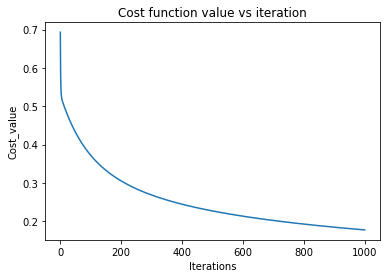

In [97]:
#plotting graph to see the behaviour of cost function with respect to iteration
pt.plot(np.arange(iterations),cost_array)
pt.xlabel('Iterations')
pt.ylabel('Cost_value')
pt.title('Cost function value vs iteration')
pt.show()
#pt.savefig('cost vs iteration.jpg',dpi=300)

In [95]:
#finding accuracy of our model
accuracy_scratch=accuracy(X_test,Y_test,w,b)

print(accuracy_scratch)                                #displaying accuracy of our scratch mode

0.875


# Comparing Accuracy of our both Models

In [96]:
print('Accuracy of our Sciket model :',accuracy_sklearn)
print('Accuracy of our Scratch model :',accuracy_scratch)


Accuracy of our Sciket model : 1.0
Accuracy of our Scratch model : 0.875
